<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
[Tip]: To execute the Python code in the code cell below, click on the cell to select it and press <kbd>Shift</kbd> + <kbd>Enter</kbd>.
</div>
<hr/>

# Exercise 1: IMDB Part 2 

## This exercise is split into two notebooks

1. Part: Scraping IMDB (the other notebook)
2. Part: Exploratory Data Analysis (this notebook)
    

## Part 2: Exploratory Data Analysis

You have to correctly implement (at least) **five** of the following 10 queries:

* Patience
* Binge Watching Steven Spielberg
* This is about me
* Workhorse
* Cashhorse
* Beloved Genres
* Must See
* Uncreative writers
* Glamour of hollywood
* Chat Client

### You have to hand in this exercise via Moodle.

<img src="images/imdb.png">

# Importing Pre-Requisites

First we need to install the required libraries

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

import numpy as np
import pandas as pd

from os.path import exists

We first load the crawled IMDB-data in JSON Format to a Pandas Dataframe.

In [28]:
def load_movies_json():
    
    local = "data/movies_full_crawled.json"
    if exists(local):
        print ("Read from local file")
        return pd.read_json(local)
    else:
        print ("Read from hu-box")        
        return pd.read_json("https://box.hu-berlin.de/f/bd7bdd460c55420783aa/?dl=1")

movies = load_movies_json()
movies.head(3)

Read from local file


,url,title,ratingValue,ratingCount,year,description,budget,gross,duration,genreList,countryList,castList,characterList,directorList
0,/title/tt0111161/,The Shawshank Redemption,9.3,3100000,1994,A banker convicted of uxoricide forms a friend...,"$25,000,000 (estimated)",29334033,142,"[Epic, Period Drama, Prison Drama, Drama]",[United States],"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...","[Andy Dufresne, Ellis Boyd 'Red' Redding, Ward...",[Frank Darabont]
1,/title/tt0068646/,The Godfather,9.2,2200000,1972,The aging patriarch of an organized crime dyna...,"$6,000,000 (estimated)",250924773,175,"[Epic, Gangster, Tragedy, Crime, Drama]",[United States],"[Marlon Brando, Al Pacino, James Caan, Richard...","[Don Vito Corleone, Michael, Sonny, Clemenza, ...",[Francis Ford Coppola]
2,/title/tt0468569/,The Dark Knight,9.1,3100000,2008,When a menace known as the Joker wreaks havoc ...,"$185,000,000 (estimated)",1009242873,152,"[Action Epic, Epic, Psychological Thriller, Su...","[United States, United Kingdom]","[Christian Bale, Heath Ledger, Aaron Eckhart, ...","[Bruce Wayne, Joker, Harvey Dent, Alfred, Rach...",[Christopher Nolan]


In [3]:
movies = movies.convert_dtypes()
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            250 non-null    string 
 1   title          250 non-null    string 
 2   ratingValue    250 non-null    Float64
 3   ratingCount    250 non-null    Int64  
 4   year           250 non-null    Int64  
 5   description    250 non-null    string 
 6   budget         250 non-null    object 
 7   gross          250 non-null    Int64  
 8   duration       250 non-null    Int64  
 9   genreList      250 non-null    object 
 10  countryList    250 non-null    object 
 11  castList       250 non-null    object 
 12  characterList  250 non-null    object 
 13  directorList   250 non-null    object 
dtypes: Float64(1), Int64(4), object(6), string(3)
memory usage: 30.5+ KB


<hr/>

## Examples 

Next, we will see some exemplary queries on this data, including

- Boolean Filtering
- Ranking
- Grouping
- Aggregation
- Counting
- Sorting

### Get the first 2 entries from the dataframe

In [4]:
result = movies.iloc[:2]
result[["title", "url"]]

,title,url
0,The Shawshank Redemption,/title/tt0111161/
1,The Godfather,/title/tt0068646/


### TOP-5 movies by largest gross

In [5]:
result = movies.sort_values(by="gross", ascending=False).iloc[:5]
result[["title", "gross"]]

,title,gross
77,Avengers: Endgame,2799439100
62,Avengers: Infinity War,2052415039
142,Spider-Man: No Way Home,1921426073
81,Top Gun: Maverick,1495696292
180,Harry Potter and the Deathly Hallows: Part 2,1342505340


### Get the Total Number of Movies with a rating above or equal to 9

In [7]:
# we first create a boolean filter on the data
movies["ratingValue"] >= 9.0

0       True
1       True
2       True
3       True
4       True
       ...  
245    False
246    False
247    False
248    False
249    False
Name: ratingValue, Length: 250, dtype: boolean

In [8]:
# apply it to the data
movies[movies["ratingValue"] >= 9.0][["title", "ratingCount"]]

,title,ratingCount
0,The Shawshank Redemption,3100000
1,The Godfather,2200000
2,The Dark Knight,3100000
3,The Godfather Part II,1500000
4,12 Angry Men,953000
5,Schindler's List,1600000
6,The Lord of the Rings: The Return of the King,2100000


In [9]:
# Using shape
result = movies[ movies["ratingValue"] >= 9.0 ].shape[0]
print(result)

7


### Total Count of Action Movies

We may use `explode` to unroll list-types in cells. This effectively creates a copy for each value in the list.

In [10]:
# First create duplicates to unroll the genre-list into own rows.
df = movies.explode('genreList')
df[df.title=="The Godfather"][["title", "genreList"]]

,title,genreList
1,The Godfather,Epic
1,The Godfather,Gangster
1,The Godfather,Tragedy
1,The Godfather,Crime
1,The Godfather,Drama


In [11]:
# First create duplicates to unroll the genre-list into own rows.
df = movies.explode('genreList')
df[df.title=="The Godfather"][["title", "genreList"]]

,title,genreList
1,The Godfather,Epic
1,The Godfather,Gangster
1,The Godfather,Tragedy
1,The Godfather,Crime
1,The Godfather,Drama


Using the exploded dataframe, we may seach for all action movies

In [12]:
# The filter by genre 'Action' and apply counting
result = df[ df["genreList"]=="Action" ].shape[0]
result

41

In [13]:
# Filter by substr 'action' and apply counting
result = df[ df["genreList"].str.lower().str.contains("action") ].shape[0]
result

77

### Sum of Gross by all Countries of Origin

Applying grouping and sorting to the data

In [14]:
# First create duplicates to unroll the country-list into own rows.
df = movies.explode('countryList')
df[["title", "countryList","gross"]]

,title,countryList,gross
0,The Shawshank Redemption,United States,29334033
1,The Godfather,United States,250924773
2,The Dark Knight,United States,1009242873
2,The Dark Knight,United Kingdom,1009242873
3,The Godfather Part II,United States,48105107
...,...,...,...
248,The Iron Giant,United States,23339506
248,The Iron Giant,Czech Republic,23339506
248,The Iron Giant,United Kingdom,23339506
249,Gandhi,United Kingdom,52768419


,gross
countryList,
United States,52038303611
United Kingdom,10461166431
New Zealand,2967726132
Canada,2922304115
Australia,2893565333
Japan,2862006452
France,2232887468
Norway,2052415039
Germany,1492098625


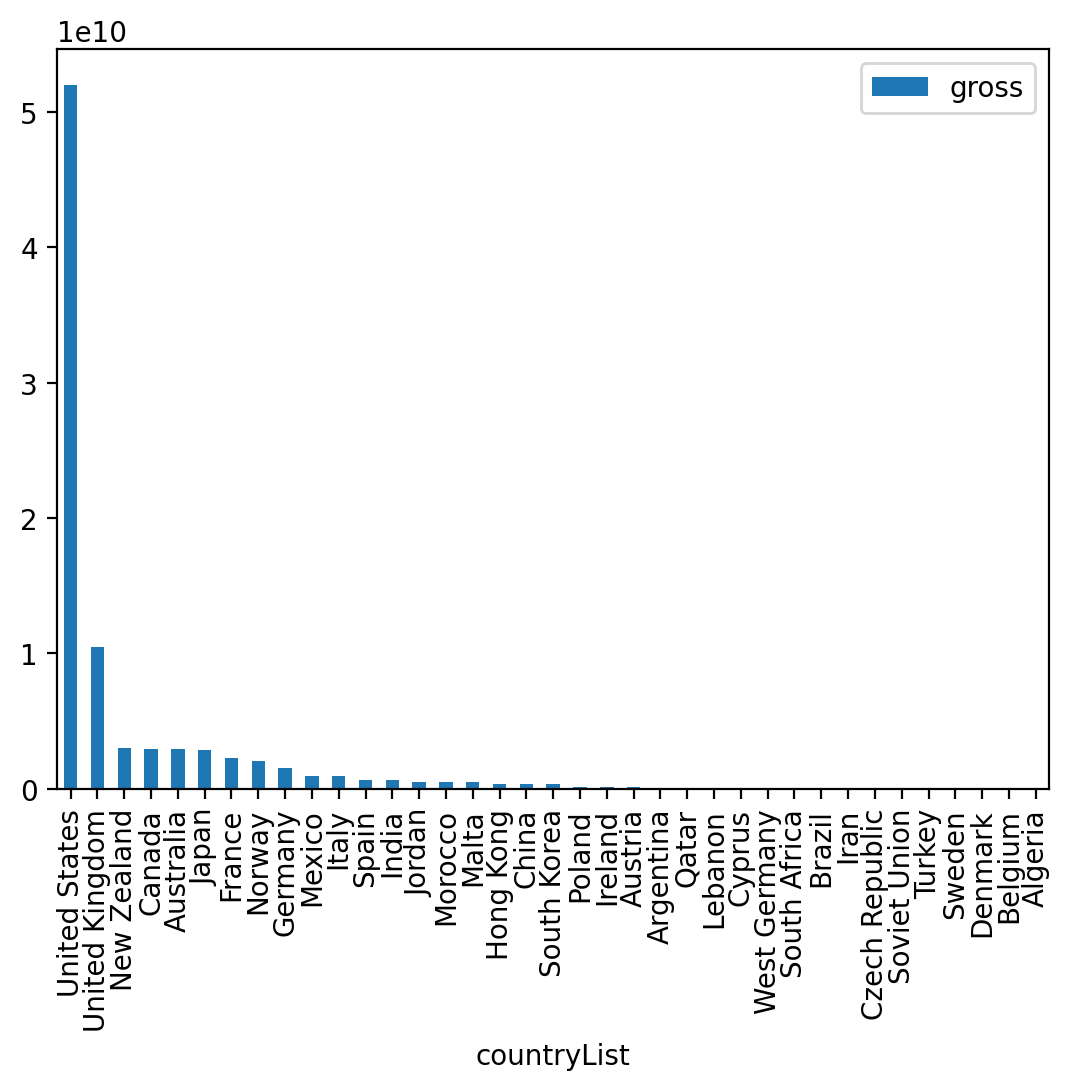

In [38]:
# Group the data, aggregate and sort the result
result = df.groupby("countryList")[["gross"]]\
        .sum() \
        .sort_values(by="gross", ascending=False)
display(result)

_ = result.plot(kind="bar")

### Count of Movies by Genre

Count the number of movies in each genre.

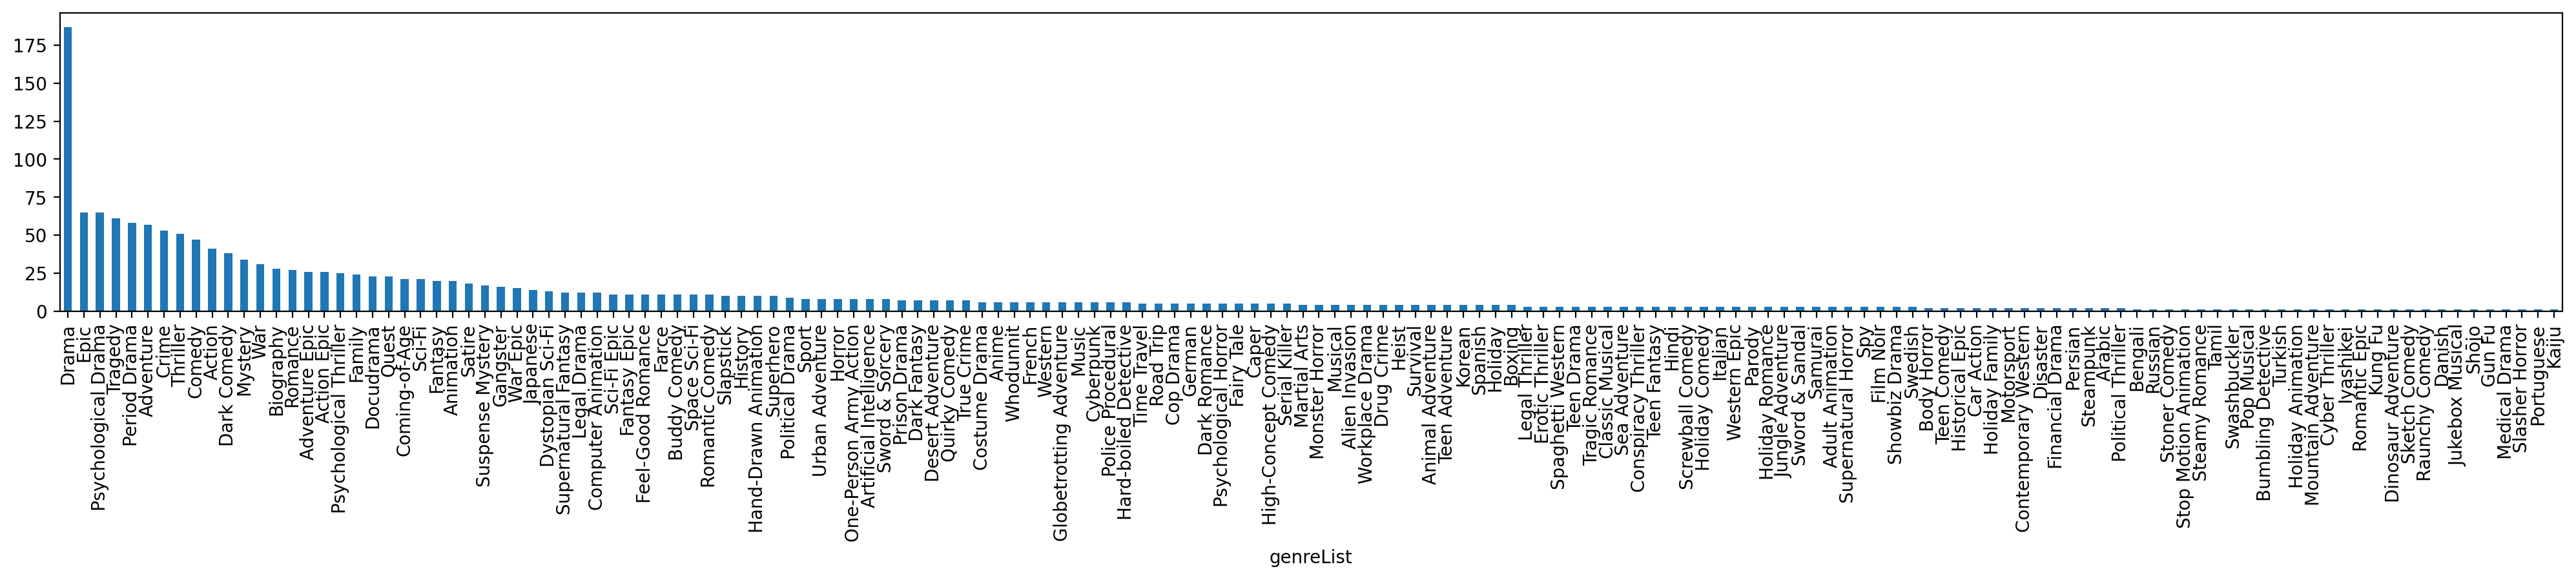

In [16]:
# First create duplicates to unroll the country-list into own rows,
# then count the number of movies in each genre
result = movies.explode('genreList')["genreList"].value_counts()
                   
# Finally, plot the result
_ = result.plot(kind="bar", figsize=(25, 3))

### Cheat-Sheet

If you need further inspiration, have a look here:
<a href="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf">Pandas Cheat-Sheet</a>

<img src="images/wrangling.png" width="300"/>

# Now it is your time to implement the following queries

You must correctly solve at least **four** out of **ten** queries.

### Query 1: Patience

<div class="alert alert-block alert-success">
Select all movies with a duration above or equal to 220 minutes.
</div>

In [37]:
result = None

# ADD YOUR CODE HERE
result = movies[movies["duration"] >= 220] [["title", "duration"]]

# DO NOT CHANGE FROM HERE 
    
result

,title,duration
79,Once Upon a Time in America,229
97,Lawrence of Arabia,227
158,Gone with the Wind,238


### Query 2: Binge Watching Steven Spielberg

<div class="alert alert-block alert-success">
Select the total duration of all movies directed by Steven Spielberg.
</div>

In [60]:
result = None

# ADD YOUR CODE HERE
result = movies.explode('directorList') #explode list for every director
result = result [ result ["directorList"] == "Steven Spielberg"] ["duration"] #only select movies where Steven Spielberg is director and show duration
result= int(result.sum()) #sum this value and convert to int
# DO NOT CHANGE FROM HERE 

result

998

### Query 3: This is about me

<div class="alert alert-block alert-success">
Provide a ranked list of the TOP-10 actors with the most screen-time, as counted by total duration of the movies they are starring in.
    
The result will be plotted.
</div>

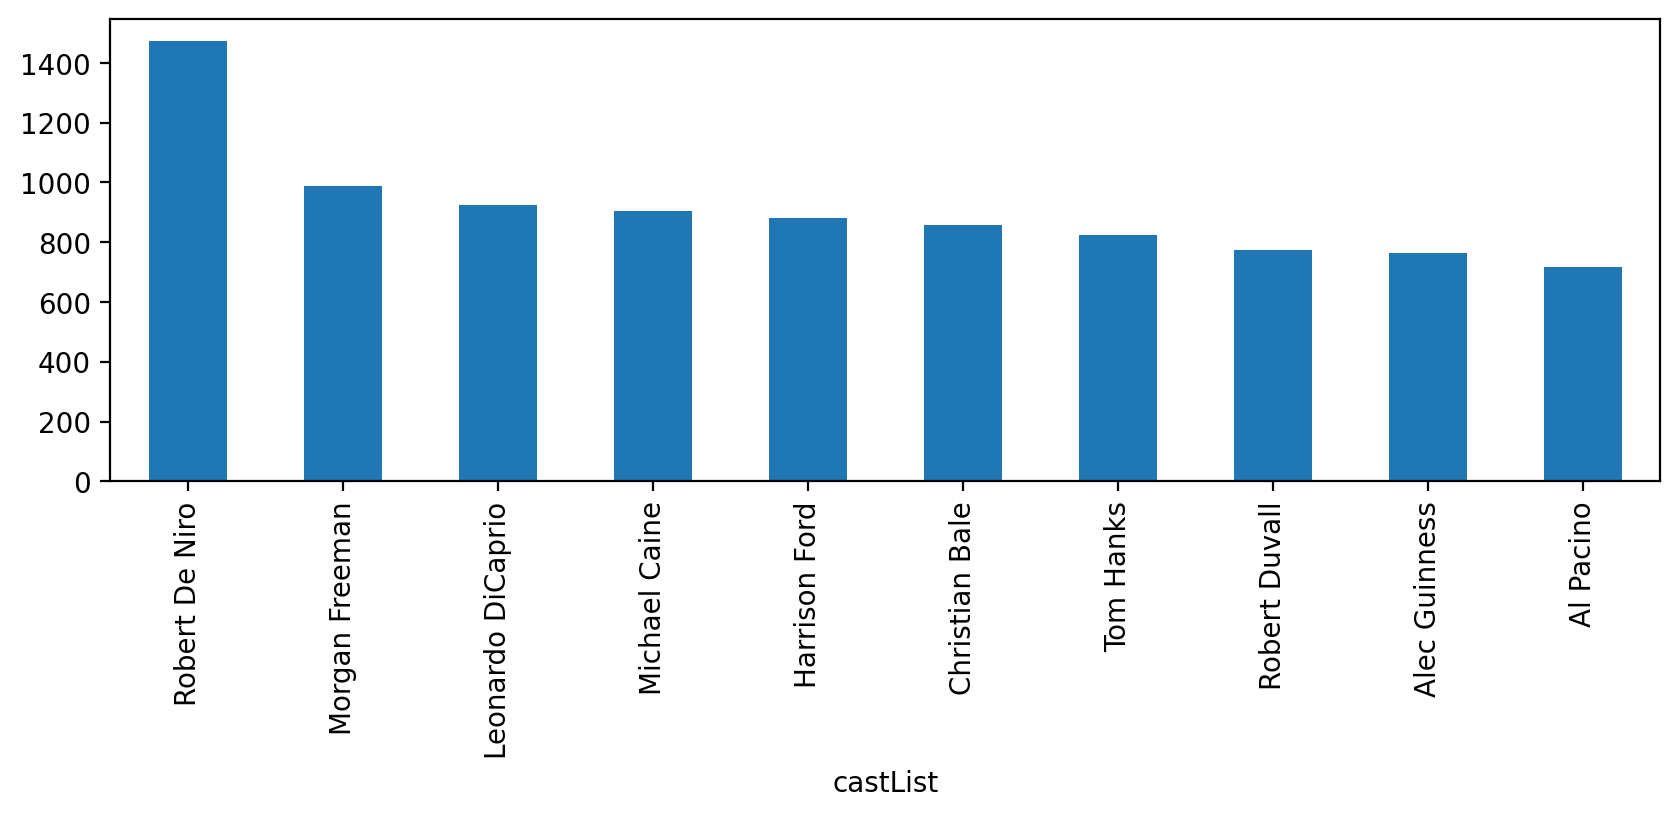

In [94]:
result = None

# ADD YOUR CODE HERE
result = movies.explode("castList").groupby(by="castList")["duration"].sum() #explode dann group und dann summieren 
result = result.sort_values(ascending = False) #sortieren
result = result.head(10) #top10
# DO NOT CHANGE FROM HERE 

if result is not None:
    result.plot(kind="bar", figsize=(10, 3))

### Query 4: Workhorse

<div class="alert alert-block alert-success">
Provide a ranked list of the TOP-10 most active actors (cast), i.e., those actors which have starred in most movies. 
    
The result will be plotted.
</div>

In [102]:
result = None

# ADD YOUR CODE HERE
result = movies.explode("castList").groupby(by="castList") ["castList"].size()


# DO NOT CHANGE FROM HERE 
result
#if result is not None:
 #   _ = result.plot(kind="bar", figsize=(10, 3))

castList
Aamir Khan        3
Aaron Eckhart     1
Aaron Lazar       1
Abbey Lee         1
Abbie Cornish     1
                 ..
Ángel Salazar     1
Åke Fridell       2
Çetin Tekindor    1
Émilie Caen       1
Özge Özberk       1
Name: castList, Length: 3850, dtype: int64

### Query 5: Cashhorse

<div class="alert alert-block alert-success">
Provide a ranked list of the TOP-10 most successful actors (cast), 
i.e., those actors which have generated the most gross.
    
The result will be plotted.
</div>

In [20]:
result = None

# ADD YOUR CODE HERE


# DO NOT CHANGE FROM HERE 


if result is not None:
    _ =  result.plot(kind="bar", figsize=(10, 3))

### Query 6: Beloved Genres

<div class="alert alert-block alert-success">
Provide a ranked list of the TOP-10 most successful genres, i.e., those genres which have generated the most gross.

The result will be plotted.
</div>

In [21]:
result = None

# ADD YOUR CODE HERE



# DO NOT CHANGE FROM HERE 


if result is not None:
    _ = result.plot(kind="bar", figsize=(10, 3))

### Query 7: Must See

<div class="alert alert-block alert-success">
List the best rated movie of each year starting from (including) 1990 until (including) 2000. Order the movies by increasing year. The result must contain exactly 11 rows.
</div>

**Hint:** `df.head(1)` may be usefull

In [22]:
result = None

# ADD YOUR CODE HERE


# DO NOT CHANGE FROM HERE 



result


### Query 8: Uncreative writers

<div class="alert alert-block alert-success">
Provide a ranked list of the TOP-10 most frequent character names of all times ordered by the frequency of occurrence in movies. 
    
The result will be plotted.    
</div>

In [23]:
result = None 

# ADD YOUR CODE HERE


# DO NOT CHANGE FROM HERE 


if result is not None:
    _ = result.plot(kind="bar", figsize=(10, 3))

### Query 9: Glamour of hollywood

<div class="alert alert-block alert-success">
Compute the cumulative gross over the years.
    
The result will be plotted.    
</div>

In [24]:
result = None 

# ADD YOUR CODE HERE


# DO NOT CHANGE FROM HERE 


if result is not None:
    _ = result.plot(kind="line", figsize=(10, 3))

### Query 10: IMDB Chat Client (Optional Task)

<div class="alert alert-block alert-success">
Implement a chat bot using MISTRAL, that answers any question to the dataset, you give using only the dataset provided. 
</div>

You must connect to this endpoint:

```python
from openai import OpenAI
base_url = "https://llm3-compute.cms.hu-berlin.de/v1/"
OPENAI_API_KEY = "secret but not used"
client = OpenAI(base_url=base_url, api_key=OPENAI_API_KEY)
```

For this to work, you must be connected to the HU Intranet (using either **HU VPN** or HU **Intranet**).

Use this page, to check, if you have a HU internal IP:
<br/>https://amor.cms.hu-berlin.de/account/ip.cgi

Then, create a chat using 

```python
resp = client.chat.completions.create(...)
out = resp.choices[0].message.content.strip().lower()
print(out)
```

Pay attention to the **prompt** used.


In [25]:
### Uncomment, if needed to install the openai library

try:
    from openai import OpenAI
except ImportError as e:
    !pip install openai

### Ask any Questions About Your Data

In [26]:
from openai import OpenAI
base_url = "https://llm3-compute.cms.hu-berlin.de/v1/"
OPENAI_API_KEY = "secret but not used"
client = OpenAI(base_url=base_url, api_key=OPENAI_API_KEY, timeout=5)

def ask_user_question(user_question, text):   

    """
    Ask a question using the IMDB dataset text.
    Uses a single response (non-streaming).
    """
    prompt = f"""
        You are an IMDB dataset assistant. You may ONLY answer using the dataset text provided below.
        If the answer is not directly supported by the dataset, say: "I don't know based on the dataset."

        Dataset:
        {text}
        """
    
    print(f"Question: '{user_question}'")
    stream = client.chat.completions.create(
        model="llm3",  # HU cluster model name
        messages=[
            {"role": "system", "content": prompt},
            {"role": "user", "content": user_question}
            ], stream=True)
    

    
    for chunk in stream:
            if chunk.choices[0].delta.content is not None:
                content = chunk.choices[0].delta.content
                content = content.replace("**", "") #remove ugly ** markdown
                print(content, end='', flush=True)  # Print tokens as they arrive



In [27]:
# DO NO CHANGE THIS CODE
movies_sub = movies.iloc[:, ~movies.columns.isin([
    'genreList','countryList','castList','characterList','directorList'])]
text = movies_sub.to_string()

user_question = "I like SciFi, and Comedies. Can you recommend a movie to me?"
ask_user_question(user_question, text)               
print("\n")

user_question = "How many movies mention american cities?"
ask_user_question(user_question, text)               
print("\n")

user_question = "Which 5 movies do I have to see if I enjoy SciFi?"
ask_user_question(user_question, text)       
print("\n")


Question: 'I like SciFi, and Comedies. Can you recommend a movie to me?'


APITimeoutError: Request timed out.

<hr/> 

# Submit via Moodle:
- HTML-exports of the notebooks for part 1 and part 2
- Source-codes of the notebooks for part 1 and part 2
- The json export `part1_submission.json` of the TOP 250 movies.